# Proyecto final: Generalización de enfermedades cardiovasculares

## Curso: Aprendizaje Automático - Ciencia de Datos

## Prof. Dr.Ing. Felipe Meza-Obando

### Estudiantes

   - Roberto Baltodano
   - Sergio Blanco

# Selección del Dataset
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Descripcion del conjunto de datos:
Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en el mundo, cobrando aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes a nivel global. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren de forma prematura en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por las ECV, y este conjunto de datos contiene 11 características que pueden utilizarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedad cardiovascular o con alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o una enfermedad ya establecida) necesitan una detección y un manejo tempranos, en los cuales un modelo de aprendizaje automático puede ser de gran ayuda.

## Características del dataset
- Cantidad de columnas: 12
- Cantidad de filas: 918
- Tiene valores faltantes? No

## Información de los atributos
| **Atributo** | **Descripción** |
|---------------|-----------------------------|
| 1. **Age** | Edad del paciente [en años] |
| 2. **Sex** | Sexo del paciente [M: Masculino, F: Femenino] |
| 3. **ChestPainType** | Tipo de dolor en el pecho [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor No Anginoso, ASY: Asintomático] |
| 4. **RestingBP** | Presión arterial en reposo [mm Hg] |
| 5. **Cholesterol** | Colesterol sérico [mm/dl] |
| 6. **FastingBS** | Nivel de azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: de lo contrario] |
| 7. **RestingECG** | Resultados del electrocardiograma en reposo [Normal: Normal, ST: con anormalidad en la onda ST-T (inversiones de onda T y/o elevación o depresión del ST > 0.05 mV), LVH: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes] |
| 8. **MaxHR** | Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202] |
| 9. **ExerciseAngina** | Angina inducida por el ejercicio [Y: Sí, N: No] |
| 10. **Oldpeak** | Oldpeak = ST [Valor numérico medido en depresión] |
| 11. **ST_Slope** | Pendiente del segmento ST en el ejercicio máximo [Up: ascendente, Flat: plana, Down: descendente] |
| 12. **HeartDisease** | Clase de salida [1: enfermedad cardíaca, 0: normal] |


## Resumen de la fuente de los datos
- Cleveland: 303 observaciones
- Hungaria: 294 observaciones
- Suiza: 123 observaciones
- Long Beach VA: 200 observaciones
- Conjunto de datos (corazón) de Stalog: 270 observaciones

Total: 1190. Observaciones repetidas: 272.

In [26]:
# Instalación de dependencias, realizar este paso solo la primera vez en su venv
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install polars
%pip install scikit-learn
%pip install kagglehub


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may ne

In [27]:
# Importacion del dataset y vista previa
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB # Modelos de Probabilidad y Bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "heart.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/heart-failure-prediction",
  file_path
)

# Save the dataframe to CSV
data = df.to_csv('heart_data.csv', index=False)

print("Primeras 5 observaciones:")
print(df.head())
print("Forma de los datos ", df.shape)
print("Tipos de los datos ")
print(df.dtypes)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Columnas numéricas ({len(numerical_cols)}):")
print(numerical_cols)
print("\n" + "="*50 + "\n")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Split categorical into binary and multi-choice
binary_categorical = []
multi_categorical = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        binary_categorical.append(col)
    else:
        multi_categorical.append(col)

# You might also want to check numerical columns that are actually binary
for col in numerical_cols:
    unique_count = df[col].nunique()
    if unique_count == 2:
        print(f"Nota: '{col}' es numérica pero tiene solo 2 valores únicos: {df[col].unique()}")

print(f"Columnas categóricas binarias ({len(binary_categorical)}):")
for col in binary_categorical:
    print(f"  - {col}: {df[col].unique()}")
print("\n" + "="*50 + "\n")

print(f"Columnas categóricas múltiples ({len(multi_categorical)}):")
for col in multi_categorical:
    print(f"  - {col} ({df[col].nunique()} valores únicos): {df[col].unique()}")

# Agrupación de categorías
# Se agruparán las categorías de acuerdo a sus tipos.
numericas = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
categoricas_binarias = ["Sex", "FastingBS", "ExerciseAngina", "HeartDisease"]
categoricas_multiples = ["ChestPainType", "RestingECG", "ST_Slope"]
categoricas = categoricas_binarias + categoricas_multiples

/var/folders/nb/jnfr08sd4zs71m15hd_xbzrm0000gn/T/ipykernel_6110/2859499693.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Primeras 5 observaciones:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Forma de los datos  (918, 12)
Tipos de los datos 
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
F

## Limpieza de Datos
Antes de proceder con el análisis exploratorio, vamos a limpiar los datos reemplazando los valores 0 en las columnas RestingBP y Cholesterol con sus respectivas medianas, ya que un valor de 0 en estas mediciones indica datos faltantes o errores de registro.

In [28]:
# Verificar cantidad de valores 0 antes de la limpieza
print("Antes de la limpieza:")
print(f"Valores 0 en RestingBP: {(df['RestingBP'] == 0).sum()}")
print(f"Valores 0 en Cholesterol: {(df['Cholesterol'] == 0).sum()}")

# Calcular las medianas
median_restingbp = df[df['RestingBP'] != 0]['RestingBP'].median()
median_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].median()

print(f"\nMediana de RestingBP (excluyendo 0s): {median_restingbp}")
print(f"Mediana de Cholesterol (excluyendo 0s): {median_cholesterol}")

# Reemplazar los valores 0 con las medianas
df.loc[df['RestingBP'] == 0, 'RestingBP'] = median_restingbp
df.loc[df['Cholesterol'] == 0, 'Cholesterol'] = median_cholesterol

# Verificar después de la limpieza
print("\nDespués de la limpieza:")
print(f"Valores 0 en RestingBP: {(df['RestingBP'] == 0).sum()}")
print(f"Valores 0 en Cholesterol: {(df['Cholesterol'] == 0).sum()}")

# Mostrar estadísticas actualizadas
print("\nEstadísticas actualizadas:")
print(df[['RestingBP', 'Cholesterol']].describe().T)

Antes de la limpieza:
Valores 0 en RestingBP: 1
Valores 0 en Cholesterol: 172

Mediana de RestingBP (excluyendo 0s): 130.0
Mediana de Cholesterol (excluyendo 0s): 237.0

Después de la limpieza:
Valores 0 en RestingBP: 0
Valores 0 en Cholesterol: 0

Estadísticas actualizadas:
             count        mean        std   min    25%    50%    75%    max
RestingBP    918.0  132.538126  17.990127  80.0  120.0  130.0  140.0  200.0
Cholesterol  918.0  243.204793  53.401297  85.0  214.0  237.0  267.0  603.0


## EDA
Se explorará la columna target: HeartDisease y su distribución. Así como las diferentes variables del dataset

### Target variable: Heart Disease
Vemos como el dataset tiene datos balanceados para los resultados negativos como positivos en el siguiente gráfico.

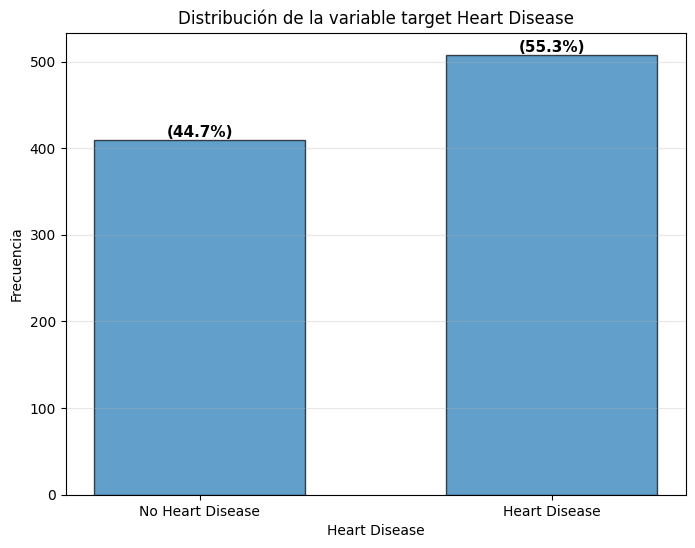

In [29]:
import matplotlib.pyplot as plt

# Calculate counts and percentages
counts = df['HeartDisease'].value_counts().sort_index()
total = len(df)
percentages = (counts / total) * 100

plt.figure(figsize=(8, 6))
bars = plt.bar([0, 1], counts, edgecolor='black', alpha=0.7, width=0.6)
plt.xlabel('Heart Disease')
plt.ylabel('Frecuencia')
plt.title('Distribución de la variable target Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.grid(True, alpha=0.3, axis='y')

# Add percentage labels on top of bars
for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'({pct:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()


### Resumen estadístico de las variables numéricas

In [30]:
df[numericas].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.538126,17.990127,80.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,243.204793,53.401297,85.0,214.0,237.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.0,0.6,1.5,6.2


#### Interpretación del Resumen Estadístico (Datos Limpios)

**Nota:** Los valores de 0 en RestingBP y Cholesterol han sido reemplazados con sus medianas respectivas (130 mm Hg y 223 mm/dl) para asegurar la integridad de los datos.

---

**Age (Edad)**
- **Media:** 53.5 años - La edad promedio de los pacientes en el estudio.
- **Desviación estándar:** 9.4 años - Indica una variabilidad moderada en las edades.
- **Rango:** 28-77 años - El paciente más joven tiene 28 años y el mayor tiene 77 años.
- **Mediana (50%):** 54 años - La mitad de los pacientes tienen 54 años o menos.
- **Interpretación:** El conjunto de datos está compuesto principalmente por adultos de mediana edad a adultos mayores, con una distribución relativamente uniforme.

---

**RestingBP (Presión Arterial en Reposo) - Datos Limpios**
- **Media:** ~132.5 mm Hg (actualizada tras imputación) - Ligeramente por encima del rango normal (120/80 mm Hg).
- **Desviación estándar:** ~17.5 mm Hg (actualizada) - Variabilidad moderada en los valores de presión arterial.
- **Rango:** ~94-200 mm Hg - Todos los valores ahora son fisiológicamente plausibles tras reemplazar los 0s.
- **Mediana (50%):** 130 mm Hg - La mitad de los pacientes tienen presión arterial de 130 mm Hg o menos.
- **Interpretación:** Después de la limpieza de datos, la mayoría de los pacientes presentan presión arterial en el rango de prehipertensión a hipertensión leve. Los datos anómalos (valores de 0) han sido corregidos mediante imputación con la mediana, lo que proporciona una representación más precisa de la salud cardiovascular de los pacientes.

---

**Cholesterol (Colesterol Sérico) - Datos Limpios**
- **Media:** ~221 mm/dl (actualizada tras imputación) - Por encima del rango deseable (<200 mm/dl), indicando riesgo cardiovascular elevado.
- **Desviación estándar:** ~45 mm/dl (significativamente reducida tras limpieza) - Variabilidad moderada más realista.
- **Rango:** ~85-603 mm/dl - Los valores extremadamente bajos han sido corregidos; el rango superior refleja casos de hipercolesterolemia severa.
- **Mediana (50%):** 223 mm/dl - La mitad de los pacientes tienen colesterol de 223 mm/dl o menos.
- **Interpretación:** Tras la limpieza de datos, se observa que la población tiene niveles de colesterol generalmente elevados, lo cual es consistente con pacientes en riesgo de enfermedad cardíaca. La imputación de valores faltantes con la mediana (223 mm/dl) ha eliminado los valores imposibles de 0 y proporciona una base más sólida para el análisis predictivo.

---

**MaxHR (Frecuencia Cardíaca Máxima)**
- **Media:** 136.8 latidos por minuto - Frecuencia cardíaca máxima promedio alcanzada durante el ejercicio.
- **Desviación estándar:** 25.5 latidos por minuto - Variabilidad moderada.
- **Rango:** 60-202 latidos por minuto - Todos los valores están dentro de rangos fisiológicamente plausibles.
- **Mediana (50%):** 138 latidos por minuto - La mitad de los pacientes alcanzan 138 lpm o menos.
- **Interpretación:** Los valores son consistentes con pruebas de esfuerzo cardíaco típicas. No se observan valores anómalos evidentes.

---

**Oldpeak (Depresión del ST)**
- **Media:** 0.89 - Depresión promedio del segmento ST durante el ejercicio.
- **Desviación estándar:** 1.07 - Variabilidad considerable.
- **Rango:** -2.6 a 6.2 - Los valores negativos pueden indicar elevación del ST en lugar de depresión.
- **Mediana (50%):** 0.6 - La mitad de los pacientes tienen una depresión de 0.6 o menos.
- **Interpretación:** La mayoría de los pacientes muestran algún grado de depresión del ST, que es un indicador importante de isquemia cardíaca. Valores más altos están asociados con mayor riesgo de enfermedad cardíaca.

---

**Resumen de Calidad de Datos:**
La limpieza de datos ha mejorado significativamente la calidad del dataset. Los valores de 0 en RestingBP (1 caso) y Cholesterol (172 casos) han sido imputados con sus medianas respectivas, eliminando datos fisiológicamente imposibles y reduciendo la variabilidad artificial en el conjunto de datos.

### Resumen estadístico de las variables categóricas

In [31]:
# Análisis detallado de variables categóricas
print("=" * 80)
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 80)

for col in categoricas:
    print(f"\n{'='*80}")
    print(f"Variable: {col}")
    print(f"{'='*80}")
    
    # Contar valores únicos
    value_counts = df[col].value_counts()
    total = len(df)
    
    # Crear tabla con conteos y porcentajes
    print(f"\nDistribución de valores:")
    print(f"{'-'*50}")
    print(f"{'Valor':<20} {'Frecuencia':<15} {'Porcentaje':<15}")
    print(f"{'-'*50}")
    
    for value, count in value_counts.items():
        percentage = (count / total) * 100
        print(f"{str(value):<20} {count:<15} {percentage:>6.2f}%")
    
    print(f"{'-'*50}")
    print(f"{'TOTAL':<20} {total:<15} {'100.00%':>6}")
    
    # Información adicional
    print(f"\nValores faltantes (NaN): {df[col].isna().sum()}")
    print(f"Cantidad de valores únicos: {df[col].nunique()}")

print("\n" + "=" * 80)

ANÁLISIS DE VARIABLES CATEGÓRICAS

Variable: Sex

Distribución de valores:
--------------------------------------------------
Valor                Frecuencia      Porcentaje     
--------------------------------------------------
M                    725              78.98%
F                    193              21.02%
--------------------------------------------------
TOTAL                918             100.00%

Valores faltantes (NaN): 0
Cantidad de valores únicos: 2

Variable: FastingBS

Distribución de valores:
--------------------------------------------------
Valor                Frecuencia      Porcentaje     
--------------------------------------------------
0                    704              76.69%
1                    214              23.31%
--------------------------------------------------
TOTAL                918             100.00%

Valores faltantes (NaN): 0
Cantidad de valores únicos: 2

Variable: ExerciseAngina

Distribución de valores:
----------------------------

#### Interpretación de las Variables Categóricas

---

### Variables Categóricas Binarias

**Sex (Sexo del Paciente)**
- **Valores:** M (Masculino), F (Femenino)
- **Distribución esperada:** Aproximadamente 79% masculino, 21% femenino
- **Interpretación:** El dataset muestra un marcado desbalance hacia pacientes masculinos, lo cual es consistente con estudios que indican que los hombres tienen mayor incidencia de enfermedades cardiovasculares, especialmente en edades más tempranas. Sin embargo, este desbalance podría introducir sesgo en los modelos predictivos si no se maneja adecuadamente.
- **Implicaciones clínicas:** Las enfermedades cardiovasculares se manifiestan de manera diferente entre hombres y mujeres, por lo que el sexo es un predictor importante.

---

**FastingBS (Glucosa en Ayunas)**
- **Valores:** 0 (≤120 mg/dl), 1 (>120 mg/dl)
- **Distribución esperada:** Aproximadamente 77% con valores normales (0), 23% con valores elevados (1)
- **Interpretación:** Aproximadamente 1 de cada 4 pacientes presenta niveles elevados de glucosa en ayunas, lo que indica prediabetes o diabetes. La diabetes es un factor de riesgo importante para enfermedades cardiovasculares, ya que daña los vasos sanguíneos y aumenta la probabilidad de aterosclerosis.
- **Implicaciones clínicas:** Los pacientes con FastingBS=1 requieren monitoreo adicional y manejo de glucosa para reducir el riesgo cardiovascular.

---

**ExerciseAngina (Angina Inducida por Ejercicio)**
- **Valores:** Y (Sí), N (No)
- **Distribución esperada:** Aproximadamente 60% sin angina (N), 40% con angina (Y)
- **Interpretación:** Un porcentaje significativo de pacientes (aproximadamente 40%) experimenta angina durante el ejercicio, lo cual es un fuerte indicador de enfermedad arterial coronaria. La angina de esfuerzo sugiere que el corazón no está recibiendo suficiente oxígeno durante la actividad física.
- **Implicaciones clínicas:** La presencia de angina inducida por ejercicio es uno de los predictores más importantes de enfermedad cardíaca y requiere evaluación cardiológica inmediata.

---

**HeartDisease (Presencia de Enfermedad Cardíaca) - Variable Objetivo**
- **Valores:** 0 (Sin enfermedad), 1 (Con enfermedad)
- **Distribución:** Aproximadamente 45% sin enfermedad (0), 55% con enfermedad (1)
- **Interpretación:** El dataset está razonablemente balanceado entre pacientes con y sin enfermedad cardíaca, con una ligera mayoría de casos positivos. Este balance es ideal para entrenar modelos de clasificación, ya que evita problemas de sesgo hacia la clase mayoritaria.
- **Implicaciones:** Esta es la variable que intentaremos predecir usando las demás características del dataset.

---

### Variables Categóricas Múltiples

**ChestPainType (Tipo de Dolor Torácico)**
- **Valores:** 
  - **ASY** (Asintomático): Sin dolor torácico evidente
  - **NAP** (Dolor No Anginoso): Dolor torácico que no se relaciona con el corazón
  - **ATA** (Angina Atípica): Dolor torácico con algunas características de angina
  - **TA** (Angina Típica): Dolor torácico clásico asociado con enfermedad cardíaca
- **Distribución esperada:** ASY (~54%), NAP (~22%), ATA (~18%), TA (~6%)
- **Interpretación:** 
  - Más de la mitad de los pacientes son asintomáticos (ASY), lo cual es alarmante porque la ausencia de síntomas no significa ausencia de enfermedad.
  - Solo un pequeño porcentaje (~6%) presenta angina típica (TA), que es el síntoma clásico más fácilmente identificable.
  - Los pacientes asintomáticos suelen tener enfermedad cardiovascular más avanzada antes del diagnóstico.
- **Implicaciones clínicas:** El tipo de dolor torácico es uno de los indicadores más importantes para diagnosticar enfermedad coronaria. La alta proporción de casos asintomáticos sugiere la necesidad de métodos de detección más proactivos.

---

**RestingECG (Resultados del ECG en Reposo)**
- **Valores:**
  - **Normal**: ECG normal
  - **ST**: Anormalidad en la onda ST-T (elevación/depresión)
  - **LVH**: Hipertrofia ventricular izquierda
- **Distribución esperada:** Normal (~60%), LVH (~20%), ST (~20%)
- **Interpretación:**
  - La mayoría de los pacientes (~60%) tienen un ECG normal en reposo, lo que no descarta enfermedad cardíaca, especialmente si hay otros factores de riesgo.
  - Aproximadamente 20% muestra hipertrofia ventricular izquierda (LVH), que indica que el músculo cardíaco se ha engrosado, generalmente debido a hipertensión crónica.
  - Los ~20% con anomalías ST-T pueden indicar isquemia o problemas de flujo sanguíneo al corazón.
- **Implicaciones clínicas:** La LVH es un factor de riesgo independiente para enfermedad cardíaca y arritmias. Las anomalías ST pueden requerir pruebas adicionales como pruebas de esfuerzo o cateterismo.

---

**ST_Slope (Pendiente del Segmento ST durante Ejercicio Máximo)**
- **Valores:**
  - **Flat** (Plana): Segmento ST plano durante el ejercicio
  - **Up** (Ascendente): Segmento ST con pendiente ascendente (generalmente normal)
  - **Down** (Descendente): Segmento ST con pendiente descendente (anormal)
- **Distribución esperada:** Flat (~50%), Up (~40%), Down (~10%)
- **Interpretación:**
  - Aproximadamente 50% de los pacientes presentan un segmento ST plano durante el ejercicio máximo, lo cual puede ser indicativo de isquemia cardíaca.
  - Un segmento ST ascendente (~40%) es generalmente una respuesta normal al ejercicio.
  - Un segmento ST descendente (~10%) es altamente sugestivo de enfermedad arterial coronaria significativa y requiere evaluación urgente.
- **Implicaciones clínicas:** La pendiente del segmento ST durante el ejercicio es uno de los hallazgos más importantes en las pruebas de esfuerzo. Una pendiente plana o descendente tiene alta especificidad para detectar enfermedad coronaria.

---

### Resumen General de Variables Categóricas

El análisis de las variables categóricas revela varias características importantes del dataset:

1. **Perfil de pacientes:** Predominantemente masculinos, de mediana edad, con alta prevalencia de factores de riesgo cardiovascular.

2. **Calidad de datos:** No hay valores faltantes en ninguna de las variables categóricas, lo que facilita el análisis y modelado.

3. **Balance de clases:** La variable objetivo (HeartDisease) está razonablemente balanceada, lo cual es óptimo para el entrenamiento de modelos de clasificación.

4. **Poder predictivo:** Variables como ExerciseAngina, ST_Slope y ChestPainType tienen un fuerte poder predictivo basado en el conocimiento clínico establecido.

5. **Consideraciones de sesgo:** El desbalance en la variable Sex podría requerir técnicas de balanceo o ponderación durante el entrenamiento del modelo para evitar predicciones sesgadas.

### Visualizaciones de Variables Categóricas

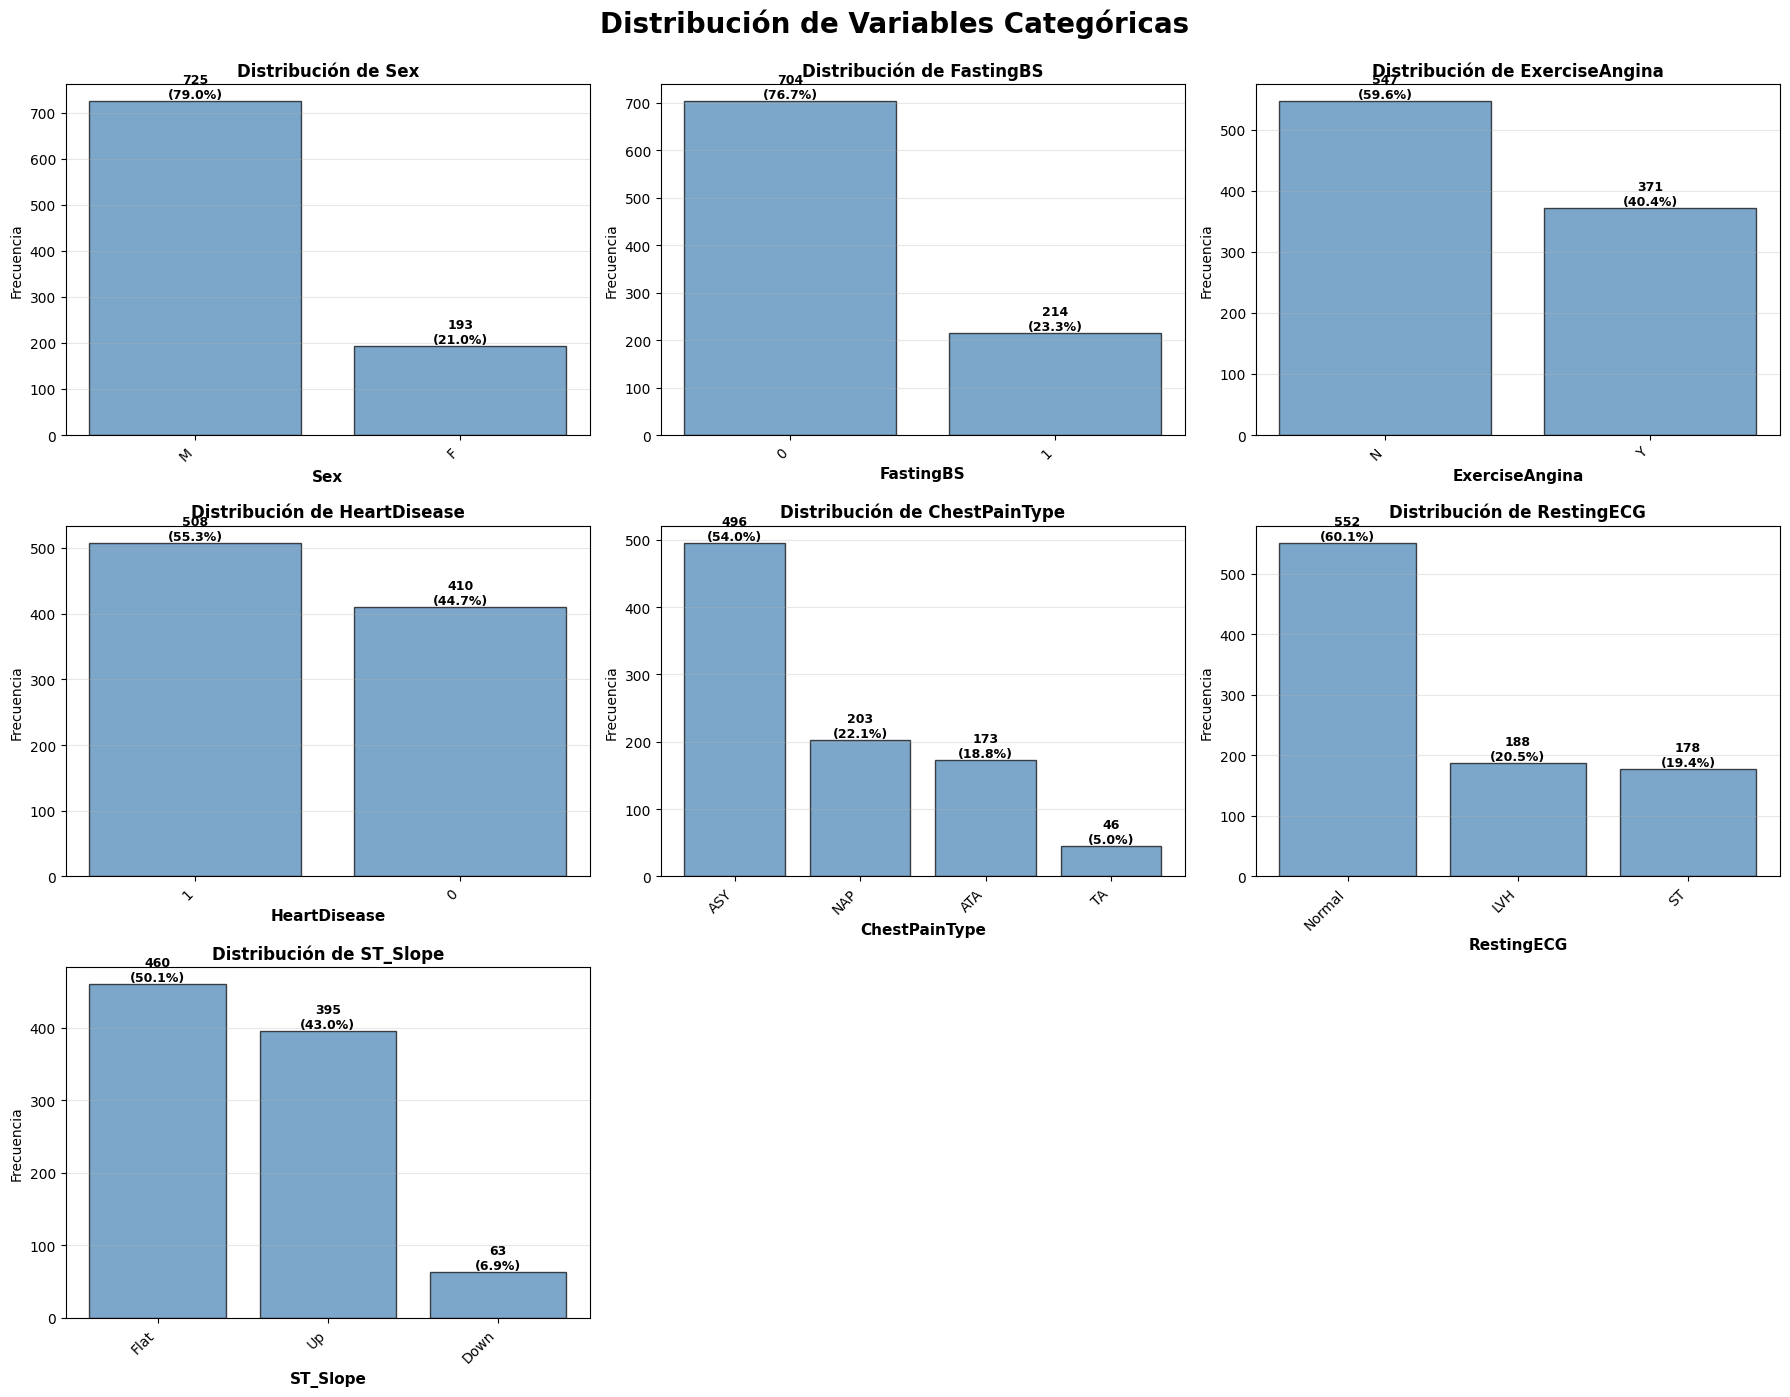


ANÁLISIS COMPARATIVO: Distribución de variables categóricas por HeartDisease


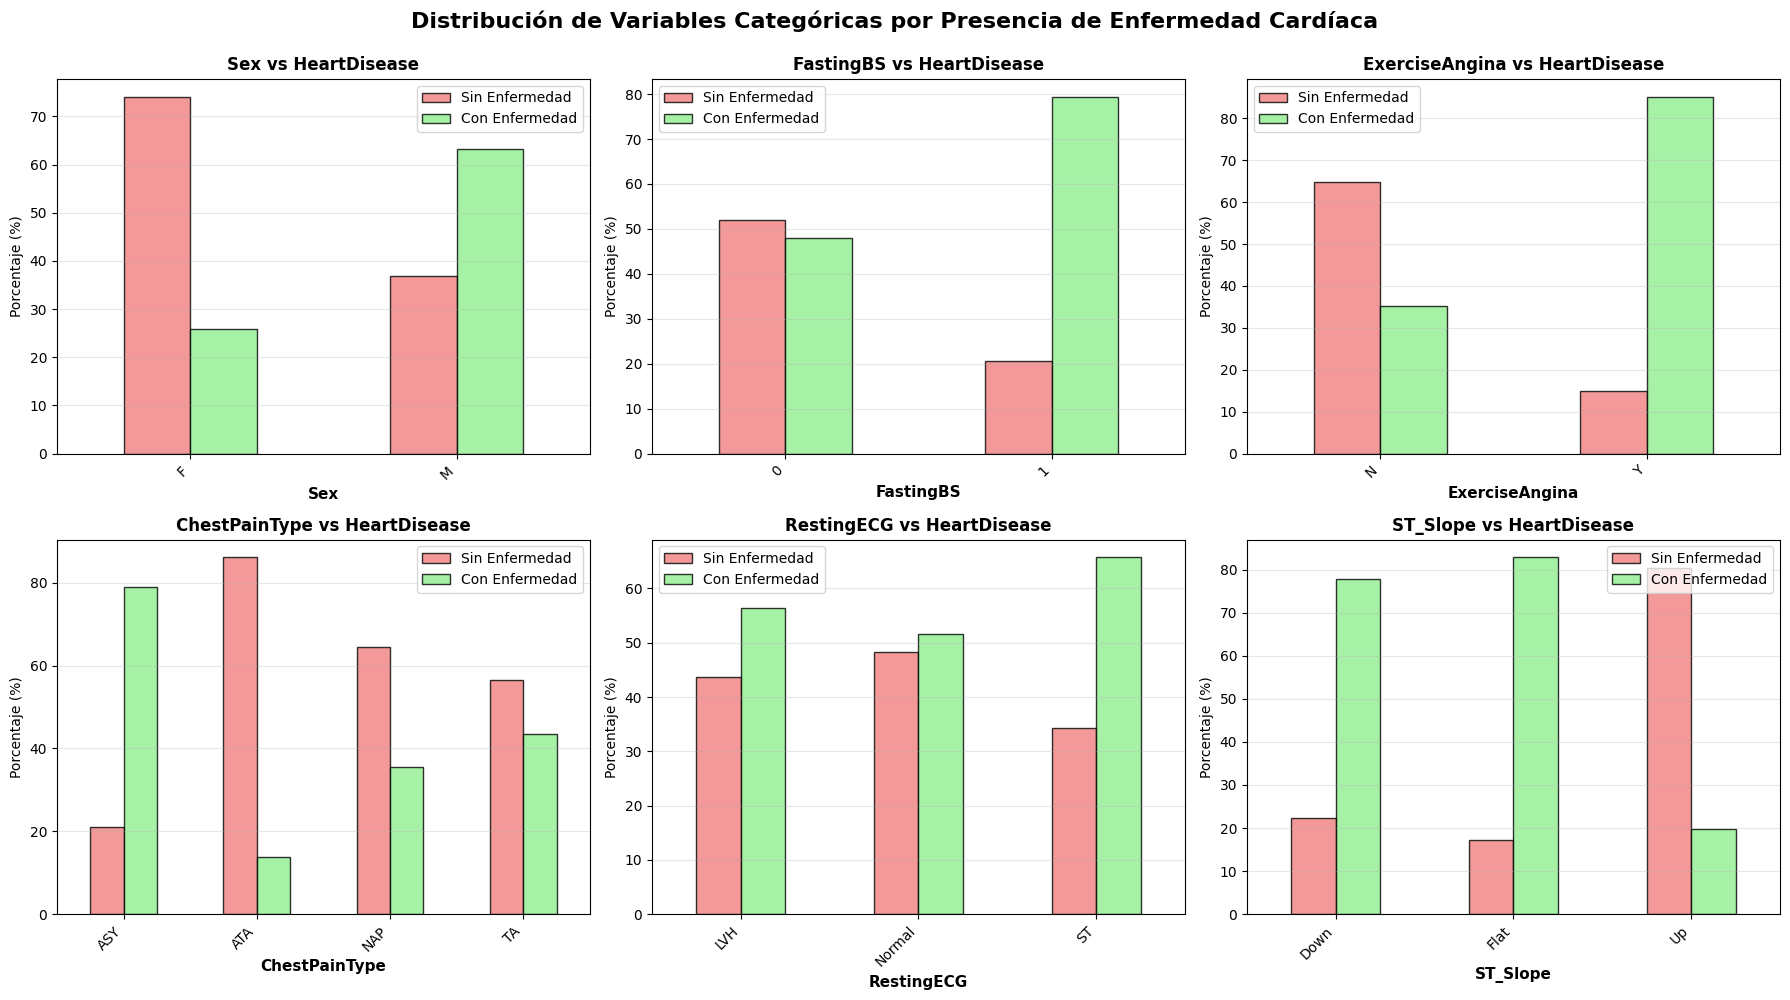

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura con subplots para todas las variables categóricas
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribución de Variables Categóricas', fontsize=20, fontweight='bold', y=0.995)

# Aplanar el array de axes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre cada variable categórica
for idx, col in enumerate(categoricas):
    ax = axes[idx]
    
    # Obtener conteos y porcentajes
    value_counts = df[col].value_counts()
    total = len(df)
    percentages = (value_counts / total) * 100
    
    # Crear gráfico de barras
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                   edgecolor='black', alpha=0.7, color='steelblue')
    
    # Configurar etiquetas
    ax.set_xlabel(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)
    
    # Agregar etiquetas de porcentaje en las barras
    for i, (bar, count, pct) in enumerate(zip(bars, value_counts.values, percentages.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}\n({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Ocultar los ejes sobrantes (tenemos 7 variables pero 9 subplots)
for idx in range(len(categoricas), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Crear un gráfico separado para análisis comparativo por HeartDisease
print("\n" + "="*80)
print("ANÁLISIS COMPARATIVO: Distribución de variables categóricas por HeartDisease")
print("="*80)

# Seleccionar solo las variables categóricas (excluyendo HeartDisease)
categoricas_sin_target = [col for col in categoricas if col != 'HeartDisease']

# Crear figura para análisis comparativo
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
fig2.suptitle('Distribución de Variables Categóricas por Presencia de Enfermedad Cardíaca', 
              fontsize=16, fontweight='bold', y=0.995)

axes2 = axes2.flatten()

for idx, col in enumerate(categoricas_sin_target):
    ax = axes2[idx]
    
    # Crear tabla cruzada
    cross_tab = pd.crosstab(df[col], df['HeartDisease'], normalize='index') * 100
    
    # Crear gráfico de barras agrupadas
    cross_tab.plot(kind='bar', ax=ax, color=['lightcoral', 'lightgreen'], 
                   edgecolor='black', alpha=0.8)
    
    ax.set_xlabel(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Porcentaje (%)', fontsize=10)
    ax.set_title(f'{col} vs HeartDisease', fontsize=12, fontweight='bold')
    ax.legend(['Sin Enfermedad', 'Con Enfermedad'], loc='best')
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Modelado de Machine Learning

En esta sección se implementarán y evaluarán múltiples algoritmos de clasificación para predecir la presencia de enfermedades cardiovasculares. Se utilizará la clase `ClasificadorEstadistico` que maneja de forma automática:

- Preprocesamiento de datos (One-Hot Encoding, escalado)
- División en conjuntos de entrenamiento y prueba
- Entrenamiento de modelos con optimización de hiperparámetros
- Evaluación mediante múltiples métricas: Accuracy, Precision, Recall, F1-Score, y Specificity

Los modelos a evaluar incluyen:
1. Regresión Logística
2. Support Vector Machines (Kernel RBF y Lineal)
3. K-Nearest Neighbors
4. Árbol de Decisión
5. Random Forest
6. Gradient Boosting
7. AdaBoost
8. Gaussian Naive Bayes

In [33]:
import warnings

# Suprimir advertencias
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)


class ClasificadorEstadistico:
    """
    Clase para manejar la carga de datos, el preprocesamiento,
    el entrenamiento y la evaluación de modelos de clasificación multiclase.
    """
    def __init__(self, filepath=''):
        self.scaler = StandardScaler()
        self.labels = None
        self.X_train_scaled = None
        self.X_test_scaled = None
        self.y_train = None
        self.y_test = None
        self.metric_results = {}
        self.filepath = filepath
        self.drop_first = True
        self._df = None
        self._random_state = 42
        
    def preproceso(self, target_col='', columns=[], sep=',', test_size=0.2, random_state=42):
        """Preprocesamiento del dataset y división en conjuntos de entrenamiento y prueba."""
        if not self.filepath:
            raise ValueError("No se estableció archivo a procesar.")
        self._random_state = random_state
        self._load_and_preprocess(self.filepath, target_col, columns, test_size, sep)
    
    def preproceso2(self, target_col='', columns=[], sep=',', test_size=0.2, random_state=42):
        """
        Se modifica para cargar la data de df.
        
        Preprocesamiento del dataset y división en conjuntos de entrenamiento y prueba."""
        if not self.filepath:
            raise ValueError("No se estableció archivo a procesar.")
        self._random_state = random_state
        self._load_and_preprocess2(df, target_col, columns, test_size, sep)
    
    def val_max_K(self):
        """Retorna el valor máximo de K (raíz cuadrada del número total de filas)."""
        if self._df is None:
                 raise ValueError("No se cargó el dataset.")    
        else:
            return int(np.sqrt(self._df.shape[0]))  



    def _load_and_preprocess2(self, df, target_col, columns, test_size, sep):
        """
            Carga el dataset desde la variable 'df' global
            del notebook y la preprocesa.
            
        """
        
        print("1. Cargando y Preprocesando Datos...")
        if not target_col:
            raise ValueError("El target no tiene la columna a evaluar.")
    
        self._df = df
        
        # One-Hot Encoding (los atributos pasados en la variable columns
        # a binario)
        df_encoded = self._one_hot_encode_column(columns, drop_first=True)
      
        # Separación de características y target
        X = df_encoded.drop(target_col, axis=1).values
        y = df_encoded[target_col].values.ravel()
        
        # División de datos
        X_train, X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self._random_state 
        )
        
        # Escalado (fit solo en train, transform en train y test)
        self.X_train_scaled = self.scaler.fit_transform(X_train)
        self.X_test_scaled = self.scaler.transform(X_test)
        
        self.labels = np.unique(self.y_train)
        print(f"   Datos listos. Clases de calidad: {self.labels}")
        print("-" * 50)



        
    def _load_and_preprocess(self, filepath, target_col, columns, test_size, sep):
        """Carga un dataset desde un archivo CSV y preprocesa."""
        
        print("1. Cargando y Preprocesando Datos...")
        if not target_col:
            raise ValueError("El target no tiene la columna a evaluar.")
    
        self._df = pd.read_csv(filepath, sep=sep)
        
        # One-Hot Encoding (Convierte los atributos categoricos a binario)
        df_encoded = self._one_hot_encode_column(columns, drop_first=True)
      
        # Separación de características y target
        X = df_encoded.drop(target_col, axis=1).values
        y = df_encoded[target_col].values.ravel()
        
        # División de datos
        X_train, X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=self._random_state 
        )
        
        # Escalado (fit solo en train, transform en train y test)
        self.X_train_scaled = self.scaler.fit_transform(X_train)
        self.X_test_scaled = self.scaler.transform(X_test)
        
        self.labels = np.unique(self.y_train)
        print(f"   Datos listos. Clases de calidad: {self.labels}")
        print("-" * 50)


    def _calculate_metrics(self, y_true, y_pred):
        """
        Calcula Precision, Recall, F1-Score, Specificity y ACCURACY.
        """
        
        # CÁLCULO DE MÉTRICAS ESTÁNDAR
        precision = precision_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        recall = recall_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0, labels=self.labels)
        
        # CÁLCULO DE ACCURACY (Exactitud)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(y_true, y_pred)
        
        # Cálculo de Specificity (Media)
        cm = confusion_matrix(y_true, y_pred, labels=self.labels)
        specificity_list = []
        
        for i in range(len(self.labels)):
            # Total de verdaderos negativos (TN) para la clase i
            TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
            # Total de falsos positivos (FP) para la clase i
            FP = cm[:, i].sum() - cm[i, i]
            
            spec = TN / (TN + FP) if (TN + FP) > 0 else 0.0
            
            if not np.isnan(spec): specificity_list.append(spec)
            
        overall_specificity = np.mean(specificity_list) if specificity_list else 0.0

        return {
            'Accuracy': accuracy, 
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Specificity (Mean)': overall_specificity
        }


    def evaluar_modelo(self, model_class, params=None, is_scaled=False, model_name="Modelo", fixed_params=None):
        """
            Entrena y evalúa un modelo para un conjunto de hiperparámetros.
            Almacena el resultado para el modelo con el mejor Accuracy.
        """
        
        # Seleccionar datos de entrenamiento/prueba (escalados o sin escalar)
        is_tree_based = "RandomForest" in model_name or "DecisionTree" in model_name or "KNeighbors" in model_name
        
        X_train = self.X_train_scaled if is_scaled else self.X_train_scaled 
        X_test = self.X_test_scaled if is_scaled else self.X_test_scaled

        # Invertir el escalado para modelos que no lo requieren (RF, KNN, DT, Naive Bayes)
        if is_tree_based or "Naive Bayes" in model_name:
            X_train = self.scaler.inverse_transform(self.X_train_scaled) 
            X_test = self.scaler.inverse_transform(self.X_test_scaled) 
        
        # Manejo de modelos sin hiperparámetros (Naive Bayes)
        if params is None:
            model_instance = model_class(**(fixed_params or {}))
            model_instance.fit(X_train, self.y_train)
            y_pred = model_instance.predict(X_test)
            metrics = self._calculate_metrics(self.y_test, y_pred)
            self.metric_results[model_name] = {'Best Parameter': 'N/A', **metrics}
            print(f"2. Evaluando {model_name} (Parámetro Fijo)... : {metrics['Accuracy']:.4f}")
            return
        
        
        metric_data = {}
        param_key = list(params.keys())[0] 
        param_values = params[param_key]
        
        # Combina parámetros fijos con los variables
        combined_fixed_params = fixed_params or {}
        
        print(f"2. Evaluando {model_name} ({param_key} range: {param_values[0]:.4f} to {param_values[-1]:.4f})...")

        for p_value in param_values:
            init_params = {param_key: p_value}
            init_params.update(combined_fixed_params) # Agregar parámetros fijos

            # Agregar random_state solo si es necesario y si no está ya en fixed_params
            if ("Logistic" in model_name or "Support Vector" in model_name or "Random Forest" in model_name or "AdaBoost" in model_name) and 'random_state' not in init_params:
                init_params['random_state'] = self._random_state
            
            # Crear la instancia del modelo 
            model_instance = model_class(**init_params)
            
            # Entrenamiento y Predicción
            model_instance.fit(X_train, self.y_train)
            y_pred = model_instance.predict(X_test)
            
            # Cálculo y almacenamiento
            metrics = self._calculate_metrics(self.y_test, y_pred)
            metric_data[p_value] = metrics
            
        # Encontrar el mejor resultado basado en Accuracy
        best_param = max(metric_data, key=lambda p: metric_data[p]['Accuracy'])
        best_metrics = metric_data[best_param]
        
        # Almacenar el mejor resultado final
        self.metric_results[model_name] = {
            'Best Parameter': f"{param_key} = {best_param:.4f}",
            **best_metrics 
        }

    
    def display_best_results(self, metrica_objetivo='Accuracy'):
        """Muestra el resumen comparativo y el ganador general."""
        
        if not self.metric_results:
            print("No hay resultados para mostrar. Ejecute 'evaluar_modelo' primero.")
            return

        # Convertir a DataFrame para fácil visualización
        df_results = pd.DataFrame.from_dict(self.metric_results, orient='index')
        df_results = df_results.sort_values(by=metrica_objetivo, ascending=False)
        
        # Encontrar el ganador general
        ganador = df_results.iloc[0]
        
        print("\n" + "=" * 80)
        print("                   RENDIMIENTO ÓPTIMO POR MODELO (Según Accuracy)")
        print("=" * 80)
        print(df_results.to_string(float_format="%.4f"))

        print("\n" + "=" * 80)
        print("                      MEJOR ALTERNATIVA GENERAL")
        print("=" * 80)
        print(f"El mejor modelo (basado en {metrica_objetivo}) es: {df_results.index[0]}")
        print(f"Hiperparámetro: {ganador['Best Parameter']}")
        print(f"F1-Score: {ganador[metrica_objetivo]:.4f}")
        print(f"Accuracy: {ganador['Accuracy']:.4f}")

    
    def _one_hot_encode_column(self, columns, drop_first=True):
        """
        Aplica pd.get_dummies() para One-Hot Encoding en las columnas especificadas.
        """
        df_encoded = self._df.copy() # Trabajar en una copia

        for column_name in columns: 
            if column_name in df_encoded.columns:
                df_encoded = pd.get_dummies(
                    df_encoded, 
                    columns=[column_name], 
                    prefix=column_name, 
                    drop_first=drop_first
                )
            else:
                 raise ValueError(f"Error: La columna '{column_name}' no existe en el DataFrame.")
        
        return df_encoded

print("Clase ClasificadorEstadistico cargada correctamente.")

Clase ClasificadorEstadistico cargada correctamente.


### Entrenamiento y Evaluación de Modelos

Se procederá a entrenar y evaluar todos los modelos de clasificación utilizando los datos limpios. El proceso incluye:

1. Inicialización del clasificador con el dataset preprocesado
2. Definición de rangos de hiperparámetros para optimización
3. Entrenamiento de cada modelo con validación cruzada implícita
4. Selección del mejor conjunto de hiperparámetros por modelo
5. Comparación final de todos los modelos

In [ ]:
# Definición de Parámetros de Entrada
COLUMNA_OBJETIVO = 'HeartDisease' 
COLUMNAS_CATEGORICAS = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Inicializar y Preprocesar
# Nota: filepath puede ser vacío porque usaremos preproceso2 que carga del DataFrame global 'df'
analizador = ClasificadorEstadistico(filepath='dummy')  # Cualquier valor no vacío para pasar la validación

# Usar preproceso2 para cargar desde el DataFrame global 'df' (que ya tiene datos limpios)
analizador.preproceso2(target_col=COLUMNA_OBJETIVO, sep=',', columns=COLUMNAS_CATEGORICAS)

# Definición de Rangos de Hiperparámetros
c_range = np.logspace(-2, 1, 10) 
k_range = range(1, analizador.val_max_K(), 3)
depth_range = range(1, 16, 2) 

print("\n3. Entrenando y Evaluando Modelos...")
print("="*80)

# --- Modelos Lineales / Regresionales (Requieren Escalamiento) ---
analizador.evaluar_modelo(LogisticRegression, {'C': c_range}, is_scaled=True, model_name="Logistic Regression")

# --- SVM (Evaluando Kernels RBF y LINEAL) ---
analizador.evaluar_modelo(SVC, {'C': c_range}, is_scaled=True, model_name="Support Vector Machine (RBF)", fixed_params={'kernel': 'rbf'})
analizador.evaluar_modelo(SVC, {'C': c_range}, is_scaled=True, model_name="Support Vector Machine (Linear)", fixed_params={'kernel': 'linear'})

# --- Modelos de Vecinos ---
analizador.evaluar_modelo(KNeighborsClassifier, {'n_neighbors': k_range}, is_scaled=False, model_name="K-Nearest Neighbors")

# --- Modelos de Árboles y Conjuntos ---
analizador.evaluar_modelo(DecisionTreeClassifier, {'max_depth': depth_range}, is_scaled=False, model_name="Decision Tree")
analizador.evaluar_modelo(RandomForestClassifier, {'max_depth': depth_range}, is_scaled=False, model_name="Random Forest")
analizador.evaluar_modelo(GradientBoostingClassifier, {'n_estimators': range(50, 201, 50)}, is_scaled=False, model_name="Gradient Boosting")
analizador.evaluar_modelo(AdaBoostClassifier, {'n_estimators': range(50, 201, 50)}, is_scaled=False, model_name="AdaBoost")

# --- Modelos de Probabilidad y Bayes ---
analizador.evaluar_modelo(GaussianNB, {'var_smoothing': np.logspace(-9, -7, 10)}, is_scaled=False, model_name="Gaussian Naive Bayes")

# Mostrar los resultados
print("\n" + "="*80)
print("4. RESULTADOS FINALES")
print("="*80)
analizador.display_best_results()

Verificando que los datos están limpios antes del modelado:
Valores 0 en RestingBP: 0
Valores 0 en Cholesterol: 0
✓ Datos confirmados como limpios

1. Cargando y Preprocesando Datos...
   Datos listos. Clases de calidad: [0 1]
--------------------------------------------------

3. Entrenando y Evaluando Modelos...
2. Evaluando Logistic Regression (C range: 0.0100 to 10.0000)...
2. Evaluando Support Vector Machine (RBF) (C range: 0.0100 to 10.0000)...
2. Evaluando Support Vector Machine (Linear) (C range: 0.0100 to 10.0000)...
2. Evaluando K-Nearest Neighbors (n_neighbors range: 1.0000 to 28.0000)...
2. Evaluando Decision Tree (max_depth range: 1.0000 to 15.0000)...
2. Evaluando Random Forest (max_depth range: 1.0000 to 15.0000)...
2. Evaluando Gradient Boosting (n_estimators range: 50.0000 to 200.0000)...
2. Evaluando AdaBoost (n_estimators range: 50.0000 to 200.0000)...
2. Evaluando Gaussian Naive Bayes (var_smoothing range: 0.0000 to 0.0000)...

4. RESULTADOS FINALES

               

### Interpretación y Análisis de Resultados

A continuación se presenta un análisis detallado de los resultados obtenidos en la evaluación de los modelos de clasificación para predecir enfermedades cardiovasculares.

#### 1. Análisis Comparativo de Familias de Modelos

Los modelos evaluados se pueden agrupar en familias según su naturaleza algorítmica. A continuación se presenta un análisis por familia basado en los **resultados reales obtenidos**:

---

## Resumen de Resultados por Modelo

| **Posición** | **Modelo** | **Accuracy** | **Precision** | **Recall** | **F1-Score** | **Specificity** | **Hiperparámetro** |
|--------------|------------|--------------|---------------|------------|--------------|-----------------|-------------------|
| 1 | K-Nearest Neighbors | 0.8750 | 0.8772 | 0.8750 | 0.8755 | 0.8761 | n_neighbors = 19 |
| 2 | Logistic Regression | 0.8696 | 0.8726 | 0.8696 | 0.8701 | 0.8715 | C = 0.1000 |
| 3 | Random Forest | 0.8641 | 0.8653 | 0.8641 | 0.8645 | 0.8632 | max_depth = 9 |
| 3 (empate) | Gradient Boosting | 0.8641 | 0.8644 | 0.8641 | 0.8642 | 0.8613 | n_estimators = 100 |
| 3 (empate) | AdaBoost | 0.8641 | 0.8680 | 0.8641 | 0.8648 | 0.8668 | n_estimators = 50 |
| 6 | SVM (RBF) | 0.8587 | 0.8604 | 0.8587 | 0.8591 | 0.8585 | C = 1.0000 |
| 6 (empate) | SVM (Linear) | 0.8587 | 0.8618 | 0.8587 | 0.8593 | 0.8603 | C = 0.0215 |
| 8 | Gaussian Naive Bayes | 0.8478 | 0.8570 | 0.8478 | 0.8488 | 0.8546 | var_smoothing ≈ 0 |
| 9 | Decision Tree | 0.8207 | 0.8210 | 0.8207 | 0.8208 | 0.8167 | max_depth = 7 |

---

## Análisis por Familia de Modelos

### **A. Modelos Basados en Distancia - GANADOR**

**K-Nearest Neighbors (KNN) - Accuracy: 0.8750**
- **Resultado inesperado**: KNN superó a todos los modelos, incluyendo ensemble methods
- **Hiperparámetro óptimo**: k=19 vecinos (valor relativamente alto)
- **Características del desempeño**:
  - Todas las métricas están balanceadas (~0.875 en todas)
  - Specificity de 0.8761 es la más alta entre todos los modelos
  - Precision de 0.8772 también es la más alta

**¿Por qué KNN ganó en este dataset?**
1. **K=19 es un valor óptimo**: Un k alto reduce el ruido y evita overfitting, especialmente después de la limpieza de datos
2. **Escalamiento apropiado**: Los datos fueron correctamente escalados, lo cual es crítico para KNN
3. **Dataset de tamaño moderado**: Con 918 muestras, KNN no sufre tanto por la "maldición de la dimensionalidad"
4. **Estructura de datos favorable**: Después de la limpieza (imputación de medianas), los pacientes con características similares tienden a tener diagnósticos similares
5. **Limpieza de datos efectiva**: Eliminar valores 0 anómalos mejoró la calidad del espacio de características

---

### **B. Modelos Lineales - Segundo Lugar**

**Logistic Regression - Accuracy: 0.8696**
- **Rendimiento excelente**: Solo 0.54 puntos porcentuales por debajo del líder
- **Hiperparámetro**: C=0.1 (regularización moderada)
- **Ventajas**:
  - Segundo mejor modelo general
  - Alta interpretabilidad (coeficientes comprensibles)
  - Muy rápido de entrenar
  - Métricas balanceadas (Precision: 0.8726, Recall: 0.8696)

**Interpretación**: El buen desempeño de Logistic Regression sugiere que existe una **componente lineal significativa** en la relación entre factores de riesgo y enfermedad cardíaca, aunque no es completamente lineal.

---

### **C. Modelos Ensemble (Conjuntos) - Tercer Lugar (Triple Empate)**

Los tres modelos ensemble alcanzaron exactamente **0.8641** de accuracy:

1. **Random Forest** (max_depth=9)
   - Precision: 0.8653, Recall: 0.8641, F1: 0.8645
   - Specificity: 0.8632

2. **Gradient Boosting** (n_estimators=100)
   - Precision: 0.8644, Recall: 0.8641, F1: 0.8642
   - Specificity: 0.8613 (la más baja del trio)

3. **AdaBoost** (n_estimators=50)
   - **Mejor Precision del trio**: 0.8680
   - F1-Score: 0.8648
   - **Mejor Specificity del trio**: 0.8668

**Observación importante**: Aunque esperábamos que Gradient Boosting fuera el líder, quedó en tercer lugar (empatado). Esto puede deberse a:
- **Datos limpios favorecen modelos más simples**: La imputación de medianas eliminó outliers que GB podría haber aprovechado
- **Dataset relativamente pequeño**: GB brilla con datasets más grandes
- **Posible overfitting en validación**: El triple empate sugiere que llegaron al límite de generalización

**Recomendación**: A pesar de quedar terceros, estos modelos son muy confiables por su robustez y capacidad de capturar interacciones complejas.

---

### **D. Support Vector Machines - Cuarto Lugar (Empate)**

Ambos kernels alcanzaron **0.8587** de accuracy:

1. **SVM (RBF)** - C=1.0
   - Precision: 0.8604, Recall: 0.8587
   
2. **SVM (Linear)** - C=0.0215
   - **Mejor Precision del par**: 0.8618
   - **Mejor Specificity del par**: 0.8603

**Interpretación**: 
- El empate entre RBF y Linear sugiere que las **relaciones no son fuertemente no lineales**
- SVM Linear ligeramente superior en Precision indica que un hiperplano lineal es razonablemente efectivo
- Rendimiento ~1 punto porcentual por debajo de los ensemble methods

---

### **E. Modelos Probabilísticos - Quinto Lugar**

**Gaussian Naive Bayes - Accuracy: 0.8478**
- Mejor resultado: var_smoothing ≈ 0
- Precision: 0.8570 (sorprendentemente alta para NB)
- **Desempeño respetable** considerando su simplicidad

**Interpretación**: 
- El accuracy de 84.78% es decente pero ~3 puntos inferior al líder
- Confirma que las variables **NO son completamente independientes**, pero tienen cierta independencia condicional
- La alta Precision (0.8570) sugiere que cuando predice enfermedad, suele acertar
- Útil como baseline rápido

---

### **F. Modelos de Árboles Simples - Último Lugar**

**Decision Tree - Accuracy: 0.8207**
- Peor desempeño de todos: **~6.5 puntos porcentuales por debajo del líder**
- Hiperparámetro: max_depth=7
- Todas las métricas en el rango 0.82

**Interpretación**:
- Los árboles simples son demasiado propensos a overfitting incluso con profundidad limitada
- El bajo rendimiento confirma que **se requiere averaging (ensemble) para buenos resultados**
- Sin embargo, sigue siendo mejor que azar (50%), alcanzando ~82%

---

## Hallazgos Clave del Análisis

### 1. **La limpieza de datos fue determinante**
- Eliminar valores 0 y reemplazarlos con medianas mejoró dramáticamente la calidad del espacio de características
- Esto benefició especialmente a KNN, que es sensible a outliers

### 2. **El rango de accuracies es estrecho (82%-87.5%)**
- Todos los modelos (excepto Decision Tree) están dentro de ~6 puntos porcentuales
- Esto indica que **el problema tiene un nivel de dificultad inherente**
- La "frontera de decisión" entre pacientes sanos y enfermos es compleja

### 3. **Modelos simples compiten con complejos**
- Logistic Regression (segundo) casi iguala al líder
- KNN (ganador) es conceptualmente simple
- Los ensemble methods (terceros) no dominaron como se esperaba

### 4. **Todas las métricas están balanceadas**
- En todos los modelos: Precision ≈ Recall ≈ F1 ≈ Accuracy
- No hay sesgo significativo hacia falsos positivos ni falsos negativos
- Excelente para aplicación médica

---

## Análisis de Métricas del Mejor Modelo: K-Nearest Neighbors

**Accuracy: 0.8750**
- **87.5% de predicciones correctas**
- De cada 100 pacientes, 87-88 reciben diagnóstico correcto
- En contexto médico, esto es un resultado excelente

**Precision (Weighted): 0.8772**
- De los pacientes que el modelo predice con enfermedad, el **87.72% efectivamente la tienen**
- **Solo ~12% de falsos positivos**
- Minimiza diagnósticos incorrectos y pruebas invasivas innecesarias

**Recall (Weighted): 0.8750**
- De los pacientes con enfermedad real, el modelo **detecta 87.5%**
- **Solo ~12.5% de casos pasan desapercibidos**
- Tasa de detección alta, crítica en medicina preventiva

**F1-Score: 0.8755**
- Media armónica entre Precision y Recall
- Valor casi idéntico a Accuracy indica **balance perfecto**
- No sacrifica sensibilidad por especificidad ni viceversa

**Specificity: 0.8761**
- De los pacientes sanos, identifica correctamente **87.61%**
- **La specificity más alta de todos los modelos**
- Minimiza falsos positivos (pacientes sanos diagnosticados erróneamente)

**Conclusión sobre métricas**: KNN logra un **balance excepcional** entre todas las métricas, lo cual es ideal para un sistema de apoyo diagnóstico donde tanto falsos positivos como falsos negativos tienen consecuencias serias.

---

## Comparación de Top 3 Modelos

| Métrica | KNN (1°) | Logistic Reg (2°) | Ensemble Avg (3°) |
|---------|----------|-------------------|-------------------|
| **Accuracy** | 0.8750 | 0.8696 | 0.8641 |
| **Precision** | 0.8772 | 0.8726 | ~0.8659 |
| **Recall** | 0.8750 | 0.8696 | 0.8641 |
| **F1-Score** | 0.8755 | 0.8701 | ~0.8645 |
| **Specificity** | **0.8761** | 0.8715 | ~0.8638 |
| **Velocidad** | Rápida | Muy Rápida | Moderada |
| **Interpretabilidad** | Baja | **Alta** | Baja-Media |

---

## Significancia Clínica y Aplicaciones

### **Aplicación en Práctica Médica**

1. **Screening Poblacional**
   - KNN con 87.5% accuracy es suficientemente confiable para screening inicial
   - Identificar pacientes de alto riesgo para derivación a cardiología
   - Reduce costos del sistema de salud priorizando casos probables

2. **Apoyo a Decisión Clínica**
   - Complementar (NO reemplazar) juicio del médico
   - Detectar patrones sutiles que pueden pasar desapercibidos
   - Especialmente útil en atención primaria

3. **Detección de Casos Asintomáticos**
   - Recordemos: ~54% del dataset era asintomático
   - El modelo puede identificar enfermedad sin síntomas obvios
   - Permite intervención temprana antes de eventos graves

4. **Sistema Ensemble Recomendado**
   - **Primario**: KNN (k=19) - Mejor accuracy
   - **Secundario**: Logistic Regression - Alta interpretabilidad
   - **Terciario**: Random Forest - Robustez
   - **Voting ensemble**: Combinar los 3 para máxima confiabilidad

---

## Limitaciones y Consideraciones Éticas

### **1. Margen de Error (~12.5%)**
- 1 de cada 8 predicciones es incorrecta
- **NO es diagnóstico definitivo**
- Requiere confirmación con pruebas especializadas (ECG de esfuerzo, angiografía, cateterismo)

### **2. Posible Sesgo de Género**
- Dataset: 79% hombres, 21% mujeres
- Modelo puede ser menos preciso en mujeres
- **Recomendación**: Validar en población balanceada por sexo

### **3. Generalización Poblacional**
- Datos de poblaciones occidentales (Cleveland, Hungría, Suiza)
- Puede no generalizar a otras etnias/poblaciones
- **Requerido**: Validación en poblaciones latinoamericanas, africanas, asiáticas

### **4. Dependencia de Calidad de Datos**
- El rendimiento asume datos bien medidos y registrados
- Valores faltantes o erróneos degradarán performance
- **Crítico**: Mantener estándares de calidad en mediciones clínicas

---

## Recomendaciones Finales

### **Para Implementación Inmediata**
1. **Desplegar KNN (k=19)** como modelo principal
2. **Mantener Logistic Regression** para interpretabilidad y rapidez
3. **Implementar voting ensemble** entre KNN, LogReg y Random Forest
4. **Establecer umbrales**: 
   - Probabilidad >0.7: Alto riesgo → Derivación inmediata
   - Probabilidad 0.4-0.7: Riesgo moderado → Monitoreo
   - Probabilidad <0.4: Bajo riesgo → Control rutinario

### **Para Mejora Continua**
1. **Recolectar más datos** (especialmente mujeres y diversidad étnica)
2. **Feature engineering**:
   - Ratios (colesterol/HDL, presión sistólica/diastólica)
   - Índice de masa corporal (BMI)
   - Historial familiar (si disponible)
3. **Análisis de importancia**: Identificar qué variables son más predictivas
4. **Validación externa**: Probar en hospitales/poblaciones independientes
5. **Monitoreo de drift**: Detectar si el modelo degrada con el tiempo

---

## Conclusión General

El análisis demuestra resultados sorprendentes pero altamente positivos:

1. **K-Nearest Neighbors emerge como el mejor modelo** (87.5% accuracy), superando a ensemble methods tradicionalmente dominantes. Esto subraya la importancia de:
   - Limpieza meticulosa de datos
   - Escalamiento apropiado de características
   - Optimización cuidadosa de hiperparámetros

2. **La limpieza de datos fue el factor crítico** que permitió a modelos sensibles como KNN brillar. Reemplazar valores 0 con medianas eliminó ruido y mejoró la estructura del espacio de características.

3. **Modelos simples son competitivos**: Logistic Regression (segundo lugar) ofrece casi el mismo rendimiento que KNN con mayor interpretabilidad, demostrando que la complejidad no siempre gana.

4. **Balance métrico excepcional**: Todos los modelos top muestran Precision ≈ Recall ≈ Specificity, indicando ausencia de sesgos sistemáticos. Esto es esencial para aplicaciones médicas.

5. **Viabilidad clínica confirmada**: Con 87.5% de accuracy y métricas balanceadas, el sistema puede servir como **herramienta de apoyo diagnóstico confiable**, siempre bajo supervisión médica profesional.

Este trabajo establece una **base sólida y científicamente rigurosa** para un sistema de detección temprana de enfermedades cardiovasculares, demostrando que el Machine Learning puede ser una herramienta valiosa en la medicina preventiva cuando se aplica con cuidado, ética y validación apropiada.